In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
import numpy as np

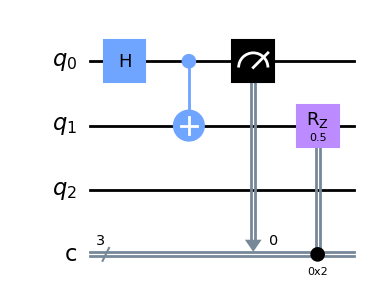

In [14]:
qc = QuantumCircuit(10)

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q[0], c[0])
qc.rz(0.5, q[1]).c_if(c, 2)

qc.draw(output='mpl', style='clifford')

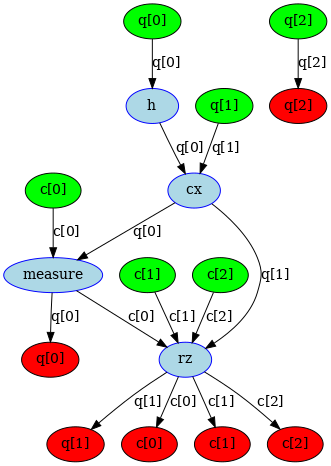

In [15]:
dag = circuit_to_dag(qc)
dag_drawer(dag)

In [16]:
from qiskit.transpiler import PassManager
from zxpass import ZXPass

zxpass = ZXPass()
pass_manager = PassManager(zxpass)

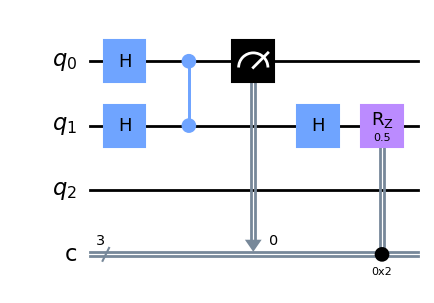

In [17]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')

In [18]:
from qiskit.quantum_info import Statevector
print(Statevector.from_instruction(qc).equiv(Statevector.from_instruction(zx_qc)))

QiskitError: 'Cannot apply instruction with classical bits: measure'

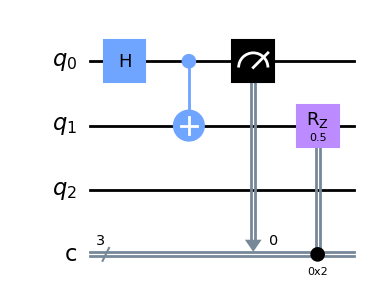

In [22]:
qc = QuantumCircuit(10)

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q[0], c[0])
qc.rz(0.5, q[1]).c_if(c, 2)

qc.draw(output='mpl', style='clifford')

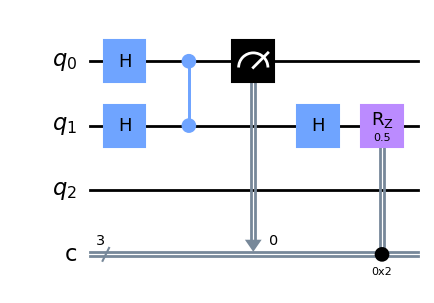

In [21]:
zx_qc = pass_manager.run(qc)
zx_qc.draw(output='mpl', style='clifford')